In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### Data Preprocessing

In [3]:
df1 = pd.read_csv('data/2019.csv')
df2 = pd.read_csv('data/2020.csv')
df3 = pd.read_csv('data/2021.csv')
df4 = pd.read_csv('data/2022.csv', decimal=",")

df2 = df2[[ "Ladder score",
            "Explained by: Log GDP per capita",
            "Explained by: Social support",
            "Explained by: Healthy life expectancy", 
            "Explained by: Freedom to make life choices",
            "Explained by: Generosity",
            "Explained by: Perceptions of corruption"]]

df3 = df3[[ "Ladder score",
            "Explained by: Log GDP per capita",
            "Explained by: Social support",
            "Explained by: Healthy life expectancy", 
            "Explained by: Freedom to make life choices",
            "Explained by: Generosity",
            "Explained by: Perceptions of corruption"]]

df4 = df4[[ "Happiness score",
            "Explained by: GDP per capita",
            "Explained by: Social support",
            "Explained by: Healthy life expectancy", 
            "Explained by: Freedom to make life choices",
            "Explained by: Generosity",
            "Explained by: Perceptions of corruption"]].dropna()

df1.rename(columns={"Country or region": "Country name", "Freedom to make life choices": "Freedom", "Perceptions of corruption": "Corruption"}, inplace=True)
df1.drop(["Country name", "Overall rank"], inplace=True, axis=1)

df2.rename(columns={"Ladder score": "Score",
                    "Explained by: Log GDP per capita": "GDP per capita",
                    "Explained by: Social support": "Social support",
                    "Explained by: Healthy life expectancy": "Healthy life expectancy",
                    "Explained by: Freedom to make life choices": "Freedom",
                    "Explained by: Generosity": "Generosity",
                    "Explained by: Perceptions of corruption": "Corruption"}, inplace=True)

df3.rename(columns={"Ladder score": "Score",
                    "Explained by: Log GDP per capita": "GDP per capita",
                    "Explained by: Social support": "Social support",
                    "Explained by: Healthy life expectancy": "Healthy life expectancy",
                    "Explained by: Freedom to make life choices": "Freedom",
                    "Explained by: Generosity": "Generosity",
                    "Explained by: Perceptions of corruption": "Corruption"}, inplace=True)

df4.rename(columns={"Happiness score": "Score",
                    "Explained by: GDP per capita": "GDP per capita",
                    "Explained by: Social support": "Social support",
                    "Explained by: Healthy life expectancy": "Healthy life expectancy",
                    "Explained by: Freedom to make life choices": "Freedom",
                    "Explained by: Generosity": "Generosity",
                    "Explained by: Perceptions of corruption": "Corruption"}, inplace=True)



In [4]:
df = pd.concat([df1, df2, df3, df4])
df = df.sort_values(by=["Score"], ascending=False).reset_index(drop=True)
df

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Corruption
0,7.8420,1.446000,1.106000,0.741000,0.691000,0.124000,0.481000
1,7.8210,1.892000,1.258000,0.775000,0.736000,0.109000,0.534000
2,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
3,7.7690,1.340000,1.587000,0.986000,0.596000,0.153000,0.393000
4,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
...,...,...,...,...,...,...,...
599,2.8530,0.306000,0.575000,0.295000,0.010000,0.202000,0.091000
600,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157
601,2.5669,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226
602,2.5230,0.370000,0.000000,0.126000,0.000000,0.122000,0.010000


In [5]:
high = df.iloc[:201,:]
high['Score'] = "High"
med = df.iloc[201:402,:]
med['Score'] = "Medium"
low = df.iloc[402:604,:]
low['Score'] = "Low"

data = pd.concat([high, med, low])


C:\Users\vince\AppData\Local\Temp\ipykernel_1080\2727163038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high['Score'] = "High"
C:\Users\vince\AppData\Local\Temp\ipykernel_1080\2727163038.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med['Score'] = "Medium"
C:\Users\vince\AppData\Local\Temp\ipykernel_1080\2727163038.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

### Splitting Train and Test Sets

In [6]:
from sklearn.model_selection import train_test_split

X = data.drop(["Score"], axis=1)
y = data["Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)  # 70% training and 30% test


### Model

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=0)
clf = MLPClassifier(hidden_layer_sizes = (250,250),max_iter=1000, random_state=0, verbose=False).fit(X_train, y_train)

scores= cross_val_score(clf, X, y, scoring="accuracy", cv=cv, n_jobs=1)

In [8]:
print("NN accuracy mean: ", sum(scores)/len(scores))

NN accuracy mean:  0.7312896174863387


In [15]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 5, random_state = 0).fit(X_train, y_train.values.ravel())
print("RF score: ", forest.score(X_train, y_train))

RF score:  0.966824644549763


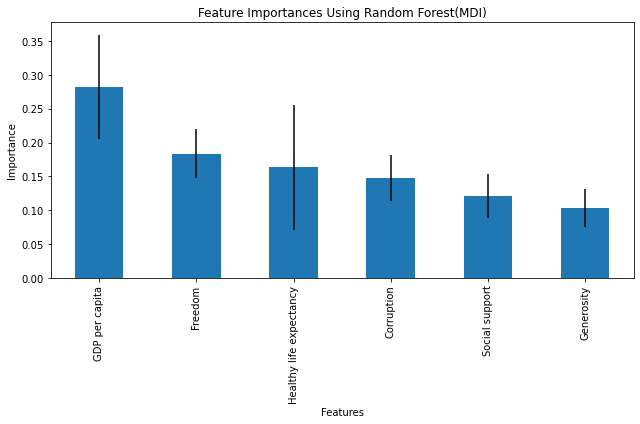

In [16]:
importances  = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0)
feature_names = list(X.columns)
forest_importances = pd.Series(importances, index = feature_names).sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (9,6))
ax.set_ylabel("Importance")
ax.set_xlabel("Features")
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature Importances Using Random Forest(MDI)")
fig.tight_layout()